In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
import sys
sys.path.append('/kaggle/working/site-packages')

In [3]:
! ls -la /kaggle/input/all-energy-v0

total 52380
drwxr-xr-x 2 nobody nogroup        0 Sep 18 03:17 .
drwxr-xr-x 3 root   root        4096 Sep 22 02:01 ..
-rw-r--r-- 1 nobody nogroup 53631231 Sep 18 03:17 all_energy.csv


In [4]:
df = pd.read_csv('/kaggle/input/all-energy-v0/all_energy.csv')

In [5]:
df

,Дата,ЦЗ,ЗСП,Час,"План ГЭС, МВт*ч","План АЭС, МВт*ч","План ТЭС, МВт*ч","ТЭС мин, МВт*ч","ТЭС макс, МВт*ч","Потребление, МВт*ч","Экспорт, МВт*ч","Импорт, МВт*ч","План СЭС, МВт*ч","План ВЭС, МВт*ч","План ВИЭ, МВт*ч","Ценопринимающее предложение, МВт*ч","Ценопринимание сверх минимальной мощности, МВт*ч","Цена продажи, руб./МВт*ч"
0,2018-01-01 00:00:00.000,Европа,FZUROE07,8,145.600,616.0,15310.118,12985.703,18417.555,16133.167,1724.097,2122.273,8.3,0.0,0,82858.55,6103.482,776.250
1,2018-01-01 00:00:00.000,Европа,FZURTU08,8,0.000,0.0,11906.500,8014.692,12166.200,9971.934,1658.871,29.774,0.0,0.0,0,82858.55,6103.482,685.400
2,2018-01-01 00:00:00.000,Европа,FZVLBS15,8,120.000,4073.0,576.000,576.000,640.000,1375.474,3260.660,1.122,0.6,0.0,0,82858.55,6103.482,781.870
3,2018-01-01 00:00:00.000,Европа,FZVLOE13,8,500.000,49.5,3857.360,3777.730,4461.390,5812.795,1369.469,2873.540,0.0,3.5,0,82858.55,6103.482,823.300
4,2018-01-01 00:00:00.000,Европа,FZYUAS18,8,0.000,0.0,431.500,326.297,531.500,532.284,30.329,154.762,2.0,0.0,0,82858.55,6103.482,890.730
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
348115,2020-08-24 00:00:00.000,Европа,FZYUKU20,23,6.200,4127.0,3009.946,2776.946,4084.745,5558.013,1812.187,364.917,0.0,105.3,0,69677.56,2497.429,1028.609
348116,2020-08-24 00:00:00.000,Европа,FZYUOE16,23,322.788,0.0,654.597,554.694,1171.700,1652.503,214.470,949.979,0.0,0.0,0,69677.56,2497.429,1033.096
348117,2020-08-24 00:00:00.000,Европа,FZYUVG17,23,1120.000,0.0,297.000,297.000,393.000,1411.464,848.521,899.929,0.0,0.0,0,69677.56,2497.429,1031.762
348118,2020-08-24 00:00:00.000,Европа,FZZMSK26,23,0.000,0.0,4777.119,4137.211,6551.619,9348.429,97.190,4778.966,0.0,0.0,0,69677.56,2497.429,1183.862


In [6]:
df.isna().sum(axis=0)

Дата                                                0
ЦЗ                                                  0
ЗСП                                                 0
Час                                                 0
План ГЭС, МВт*ч                                     0
План АЭС, МВт*ч                                     0
План ТЭС, МВт*ч                                     0
ТЭС мин, МВт*ч                                      0
ТЭС макс, МВт*ч                                     0
Потребление, МВт*ч                                  0
Экспорт, МВт*ч                                      0
Импорт, МВт*ч                                       0
План СЭС, МВт*ч                                     0
План ВЭС, МВт*ч                                     0
План ВИЭ, МВт*ч                                     0
Ценопринимающее предложение, МВт*ч                  0
Ценопринимание сверх минимальной мощности, МВт*ч    0
Цена продажи, руб./МВт*ч                            0
dtype: int64

In [7]:
# rename columns for easier access
new_names = ['date', 
             'price_zone', 
             'free_transfer_zone', 
             'hour', 
             'hydro_plan',
             'nuclear_plan', 
             'thermal_plan', 
             'thermal_min', 
             'thermal_max',
             'consumption', 
             'export',
             'import',
             'solar_plan',
             'wind_plan',
             'renewable_plan',
             'supply_1',
             'supply_2',
             'price',
            ]

df = df.rename(columns = dict(zip(df.columns, new_names)))
df.columns

Index(['date', 'price_zone', 'free_transfer_zone', 'hour', 'hydro_plan',
       'nuclear_plan', 'thermal_plan', 'thermal_min', 'thermal_max',
       'consumption', 'export', 'import', 'solar_plan', 'wind_plan',
       'renewable_plan', 'supply_1', 'supply_2', 'price'],
      dtype='object')

In [8]:
for col in df.columns:
    print(col)
    print(df[col].value_counts().sort_index())
    print()

date
date
2018-01-01 00:00:00.000    360
2018-01-02 00:00:00.000    360
2018-01-03 00:00:00.000    360
2018-01-04 00:00:00.000    360
2018-01-05 00:00:00.000    360
                          ... 
2020-08-20 00:00:00.000    360
2020-08-21 00:00:00.000    360
2020-08-22 00:00:00.000    360
2020-08-23 00:00:00.000    360
2020-08-24 00:00:00.000    360
Name: count, Length: 967, dtype: int64

price_zone
price_zone
Европа        348120
Name: count, dtype: int64

free_transfer_zone
free_transfer_zone
FZSZKO28      23208
FZSZOE27      23208
FZURKR12      23208
FZURNT09      23208
FZUROE07      23208
FZURTU08      23208
FZVLBS15      23208
FZVLOE13      23208
FZYUAS18      23208
FZYUDA23      23208
FZYUKU20      23208
FZYUOE16      23208
FZYUVG17      23208
FZZMSK26      23208
FZZNOE24      23208
Name: count, dtype: int64

hour
hour
0     14505
1     14505
2     14505
3     14505
4     14505
5     14505
6     14505
7     14505
8     14505
9     14505
10    14505
11    14505
12    14505
13    14

Value counts suggest that: 
- **date** is datetime
- **price_zone** and **renewable_plan** are zero-variance and thus could be dropped
- **free_transfer_zone** is categorical
- hydro-, nuclear-, solar- and wind plans have sizeable proportions of zeros (see below)

In [9]:
#Value counts suggest that: 
#- **date** is datetime
#- **price_zone** and **renewable_plan** are zero-variance and thus could be dropped
#- **free_transfer_zone** is categorical
#- hydro-, nuclear-, solar- and wind plans have sizeable proportions of zeros (see below)

In [10]:
with pd.option_context("display.precision", 2): 
    print( 
        df
        .apply(lambda col: col.value_counts()[0] / df.shape[0] * 100 if any(col==0) else 0)
        .sort_values()
        .rename('fraction of zeros, %')
    )

date                    0.00
price_zone              0.00
free_transfer_zone      0.00
supply_1                0.00
consumption             0.00
supply_2                0.00
price                   0.14
thermal_min             0.43
thermal_plan            0.43
thermal_max             0.43
hour                    4.17
export                  6.53
import                  9.49
hydro_plan             26.78
nuclear_plan           54.34
solar_plan             78.25
wind_plan              86.67
renewable_plan        100.00
Name: fraction of zeros, %, dtype: float64


In [11]:
def suggest_compact_dtypes(df, columns=None, ignore_nans=False):
    if not ignore_nans and df.isna().sum().sum()>0:
        raise ValueError("dataframe contains nan values; some columns won't be converted because of nans")
        
    if columns is None:
        columns = df.columns
    int_types = ['int8', 'int16', 'int32', 'int64']
    float_types = ['float16', 'float32', 'float64']
    
    convert = {}
    for c in columns:    
        vals = df.loc[df.loc[:,c].notna(), c] 
        if vals.dtype==object:
            try:
                pd.to_datetime(vals)
                #print(f'{c} is categorical')
                convert[c] = 'datetime64[ns]'
                continue
            except:
                print(f'failed to convert {c} to datetime64[ns]')
            
            try:
                vals.astype('category')
                #print(f'{c} is categorical')
                convert[c] = 'category'
                continue
            except:
                print(f'failed to convert {c} to categorical type')
                
        if (vals.astype('int64') == vals).all():
            types = int_types
            info = np.iinfo
        else:
            types = float_types
            info = np.finfo
        
        for t in types:
            if (vals.min() >= info(t).min) and\
            (vals.max() <= info(t).max):
                convert[c] = t
                break
        if c not in convert:
            raise ValueEror(f"no suggestion for column {c}")
        
    return convert

In [12]:
df.dtypes

date                   object
price_zone             object
free_transfer_zone     object
hour                    int64
hydro_plan            float64
nuclear_plan          float64
thermal_plan          float64
thermal_min           float64
thermal_max           float64
consumption           float64
export                float64
import                float64
solar_plan            float64
wind_plan             float64
renewable_plan          int64
supply_1              float64
supply_2              float64
price                 float64
dtype: object

In [13]:
suggest_compact_dtypes(df)

failed to convert price_zone to datetime64[ns]
failed to convert free_transfer_zone to datetime64[ns]


/tmp/ipykernel_32/3151323755.py:15: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  pd.to_datetime(vals)


{'date': 'datetime64[ns]',
 'price_zone': 'category',
 'free_transfer_zone': 'category',
 'hour': 'int8',
 'hydro_plan': 'float16',
 'nuclear_plan': 'float16',
 'thermal_plan': 'float16',
 'thermal_min': 'float16',
 'thermal_max': 'float16',
 'consumption': 'float16',
 'export': 'float16',
 'import': 'float16',
 'solar_plan': 'float16',
 'wind_plan': 'float16',
 'renewable_plan': 'int8',
 'supply_1': 'float32',
 'supply_2': 'float16',
 'price': 'float16'}

Should we downcast float64 columns to float16?

In [14]:
# Should we downcast float64 columns to float16?

In [15]:
# float16 is too small: summation causes overflowis
( df
 .select_dtypes('float64')
 .astype('float16')
 .mean(axis=0)
)

/opt/conda/lib/python3.10/site-packages/numpy/core/_methods.py:48: RuntimeWarning: overflow encountered in reduce
  return umr_sum(a, axis, dtype, out, keepdims, initial, where)


hydro_plan     NaN
nuclear_plan   NaN
thermal_plan   NaN
thermal_min    NaN
thermal_max    NaN
consumption    NaN
export         NaN
import         NaN
solar_plan     NaN
wind_plan      NaN
supply_1       NaN
supply_2       NaN
price          NaN
dtype: float16

In [16]:
# float32 is big enough
( df
 .select_dtypes('float64')
 .astype('float32')
 .mean(axis=0)
)

hydro_plan        534.579773
nuclear_plan     1560.423706
thermal_plan     3913.612793
thermal_min      3025.442627
thermal_max      4477.095215
consumption      5747.527344
export           1515.226074
import           1427.516602
solar_plan          9.413484
wind_plan           2.601912
supply_1        82868.078125
supply_2         5942.295410
price            1210.504272
dtype: float32

In [17]:
# Applying changes we've discussed so far

df = ( df
      # casting\shrinking
      .astype({'date': 'datetime64[ns]',
               'free_transfer_zone': 'category',
               'hour': 'int8'})
      .astype({ col: 'float32' for col in df.select_dtypes('float64').columns })
      
      # dropping zero-variance features
      .drop(columns = ['price_zone',
                       'renewable_plan'])
      
      # removing trailing spaces
      .pipe(lambda df: df.assign(free_transfer_zone =
              df.free_transfer_zone.cat.rename_categories(lambda s: s.strip())))
)

In [18]:
# There are 15 transfer zones 
df.free_transfer_zone.value_counts().shape

(15,)

In [19]:
pd.options.display.max_rows = 50
pd.options.display.min_rows = 50

In [20]:
df.groupby(['date', 'free_transfer_zone'])['price'].count()

date        free_transfer_zone
2018-01-01  FZSZKO28              24
            FZSZOE27              24
            FZURKR12              24
            FZURNT09              24
            FZUROE07              24
            FZURTU08              24
            FZVLBS15              24
            FZVLOE13              24
            FZYUAS18              24
            FZYUDA23              24
            FZYUKU20              24
            FZYUOE16              24
            FZYUVG17              24
            FZZMSK26              24
            FZZNOE24              24
2018-01-02  FZSZKO28              24
            FZSZOE27              24
            FZURKR12              24
            FZURNT09              24
            FZUROE07              24
            FZURTU08              24
            FZVLBS15              24
            FZVLOE13              24
            FZYUAS18              24
            FZYUDA23              24
                                  ..
2020-08

In [21]:
# Each date is associated with 24 records for each zone. 24 hours?  
all(df.groupby(['date', 'free_transfer_zone'])['price'].count() == 24)

True

In [22]:
df.hour.value_counts().sort_index()

hour
0     14505
1     14505
2     14505
3     14505
4     14505
5     14505
6     14505
7     14505
8     14505
9     14505
10    14505
11    14505
12    14505
13    14505
14    14505
15    14505
16    14505
17    14505
18    14505
19    14505
20    14505
21    14505
22    14505
23    14505
Name: count, dtype: int64

In [23]:
# Yep
all(df.groupby(['date', 'free_transfer_zone', 'hour'])['price'].count() == 1)

True

In [24]:
# date is sorted
all(df['date'].sort_values().reset_index() == df['date'].reset_index())

True

In [25]:
# no gaps between dates
(df['date'].iloc[1:].reset_index() - df['date'].iloc[:-1].reset_index())['date'].value_counts()

date
0 days    347153
1 days       966
Name: count, dtype: int64

In [26]:
# applying next batch of transforms
df = ( df
      .assign( dtime = df['date'] + pd.to_timedelta(df.hour, unit='hour'))
      .drop(columns= ['date', 'hour'])
      .pivot(index='dtime', columns='free_transfer_zone')
      .sort_index()
     )

In [27]:
import matplotlib.dates as mdates
from matplotlib.dates import DateFormatter

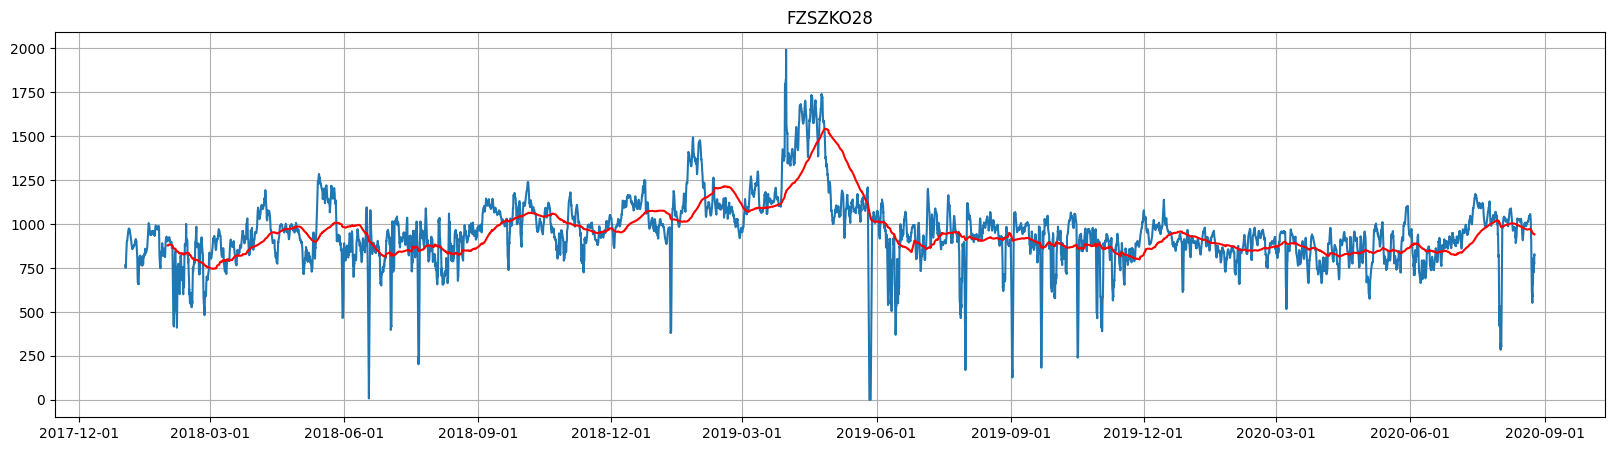

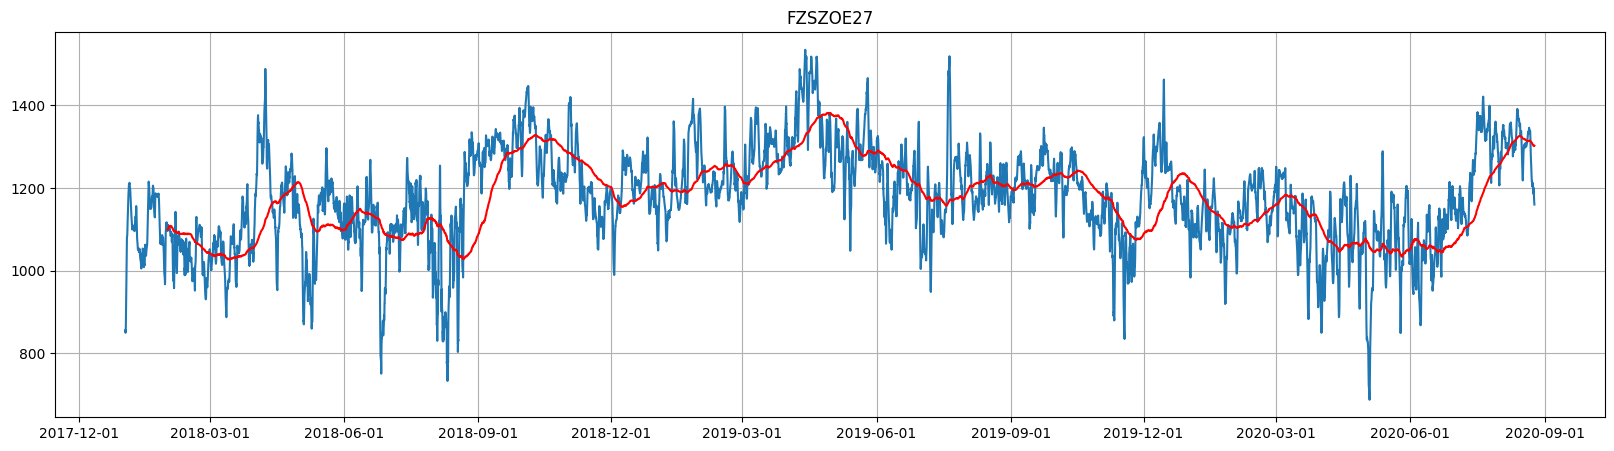

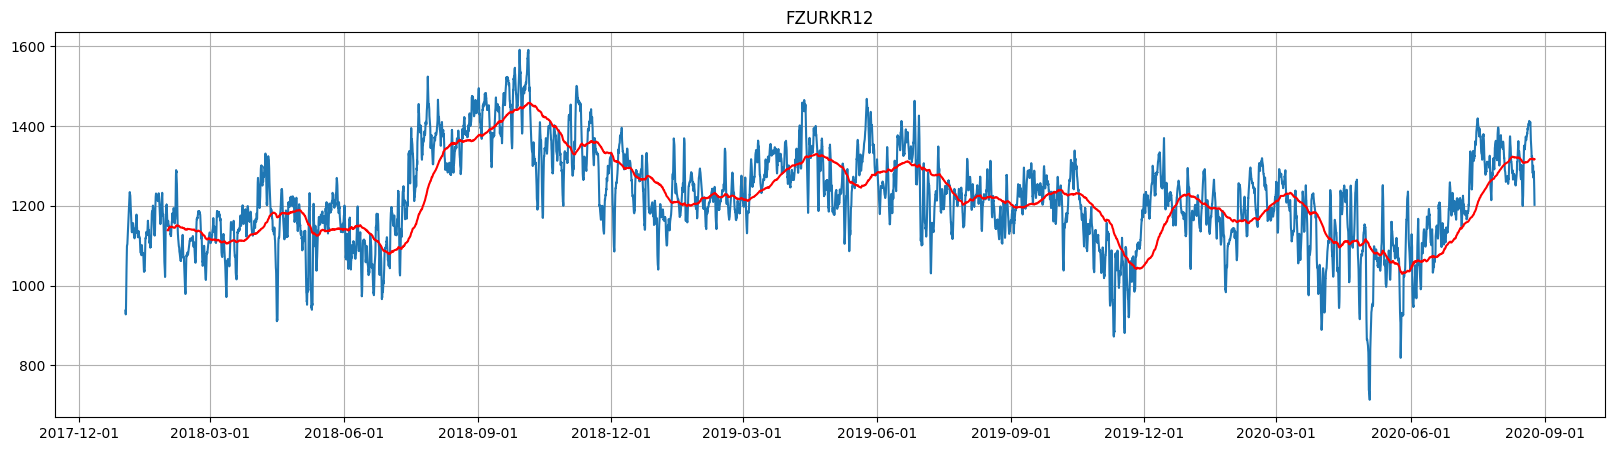

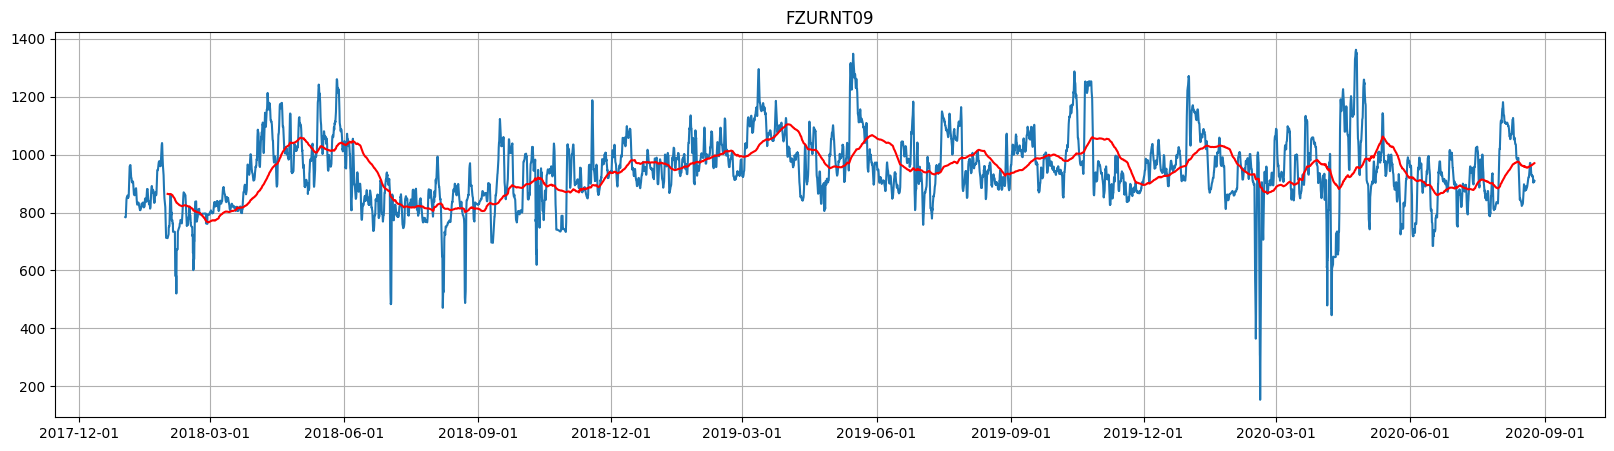

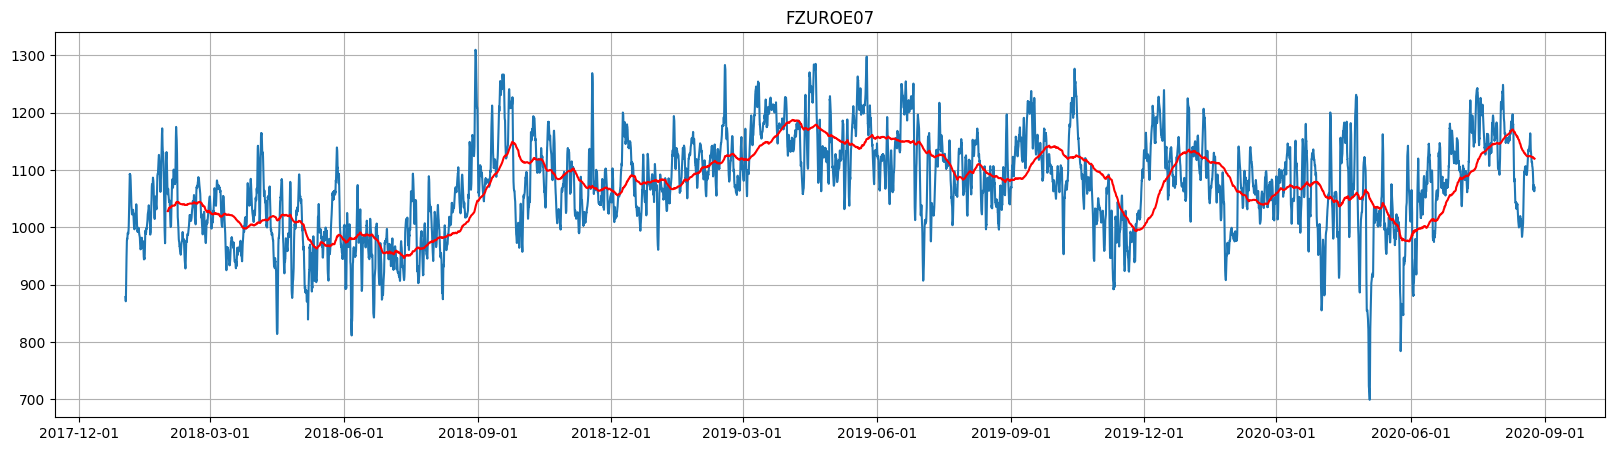

In [31]:
zones = df.columns.get_level_values(1).unique()
for i in range(5):
    
    vals = ( df.loc[:,('price',zones[i])]
          .rolling(24)
          .mean())
    
    fig,ax=plt.subplots(figsize=(20,5))
    ax.plot(vals.index, vals.values)
    
    vals72 = ( df.loc[:,('price',zones[i])]
          .rolling(720)
          .mean())
    
    ax.plot(vals72.index, vals72.values, c='red')
    
    ax.set_title(zones[i])
    ax.grid()
    
    ax.xaxis.set_major_formatter(DateFormatter('%Y-%m-%d'))
    ax.xaxis.set_major_locator(mdates.MonthLocator(bymonth=[3,6,9,12]))

In [29]:
600/24

25.0

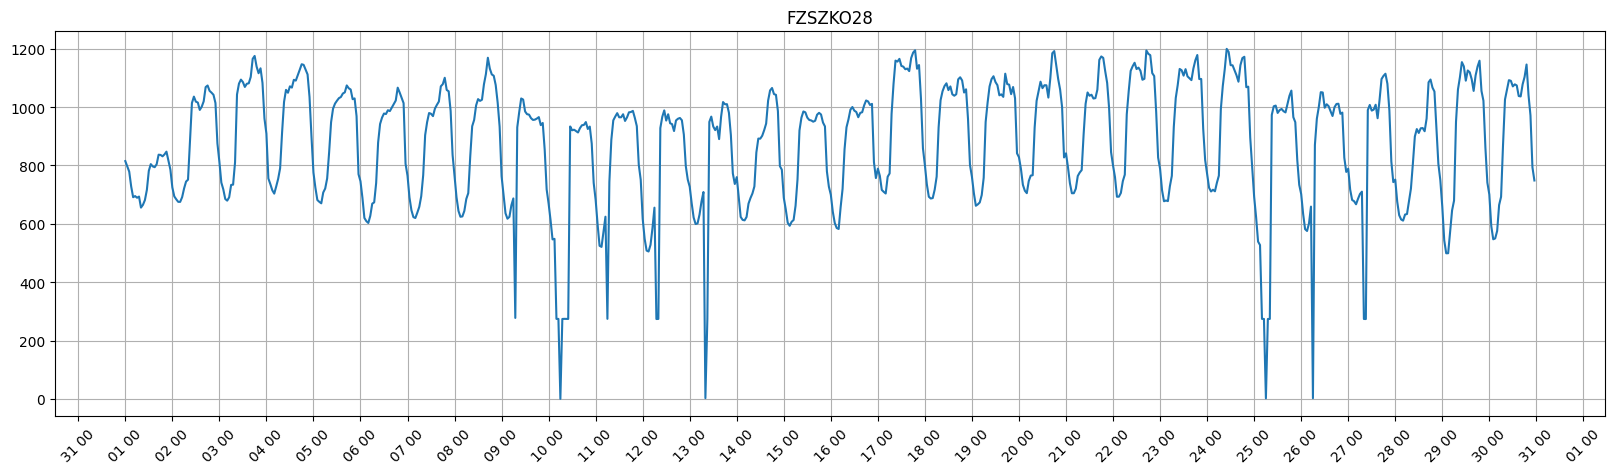

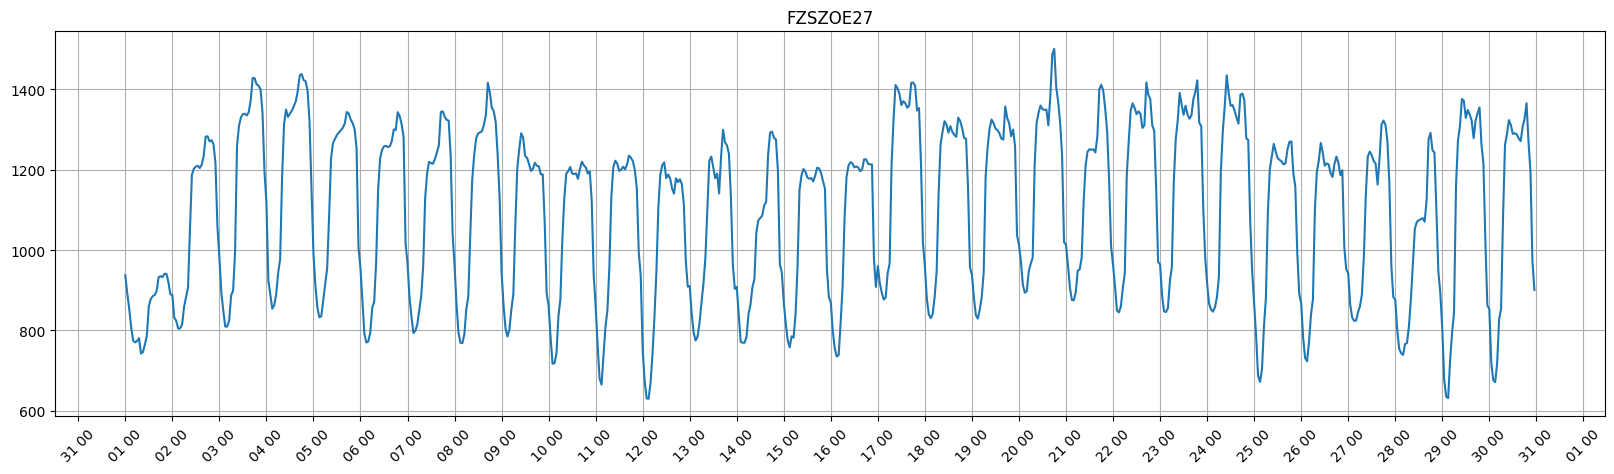

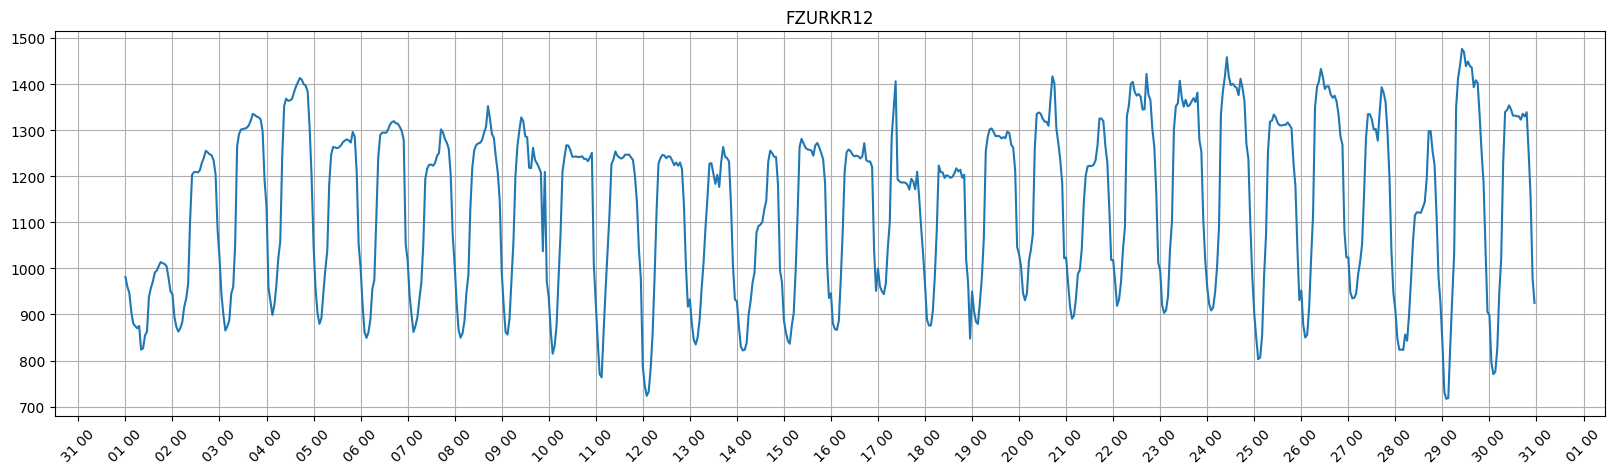

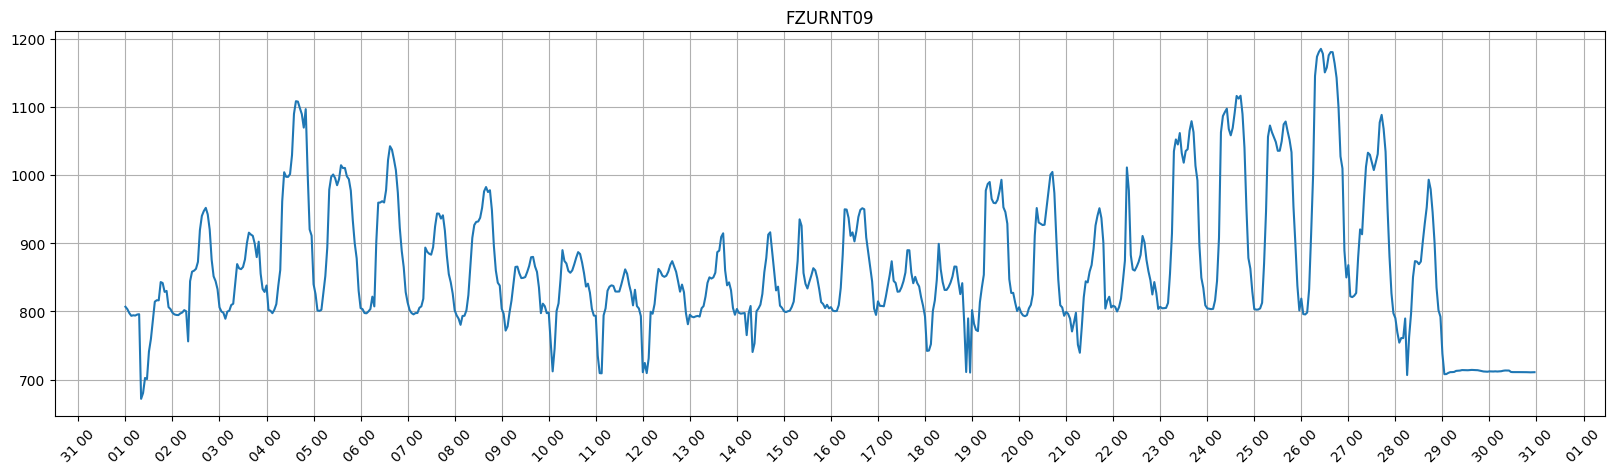

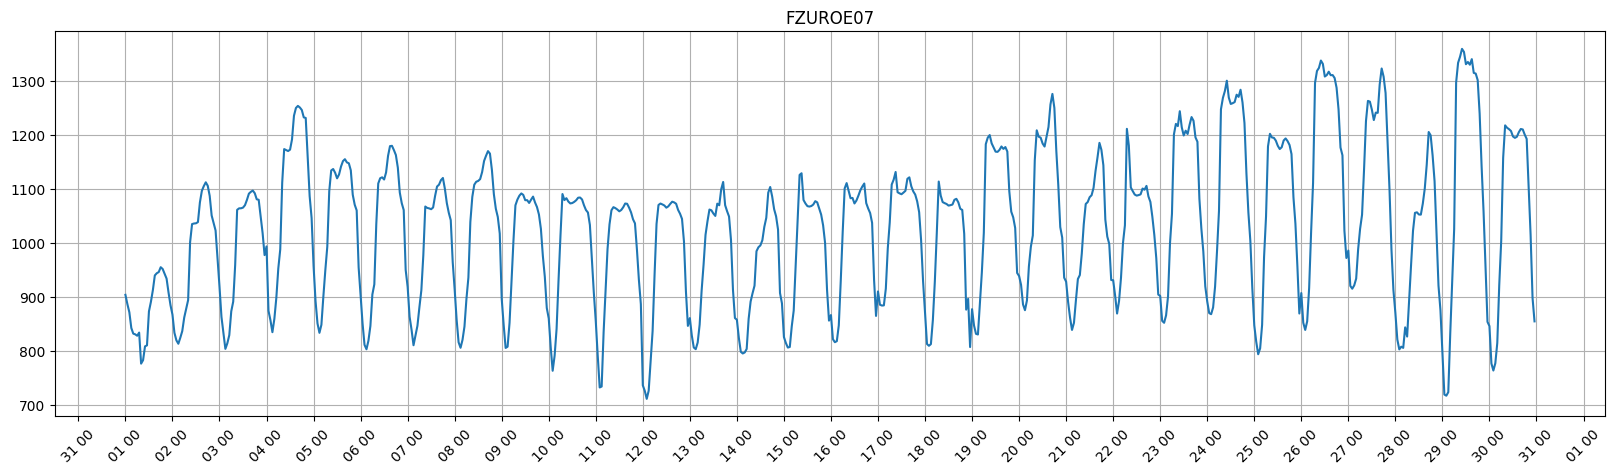

In [32]:
zones = df.columns.get_level_values(1).unique()
for i in range(5):
    
    vals = ( df.loc[:, ('price',zones[i])]
           )
    span = 24*30

    fig,ax=plt.subplots(figsize=(20,5))
    ax.plot(vals.iloc[:span].index, vals.iloc[:span])
    
    ax.set_title(zones[i])
    ax.grid()
    ax.tick_params(axis='x', rotation=45)
    ax.xaxis.set_major_formatter(DateFormatter('%d %H'))
    ax.xaxis.set_major_locator(mdates.HourLocator(byhour=[0]))

In [ ]:
# Day cycle is clearly seen

In [42]:
import statsmodels.api as sm

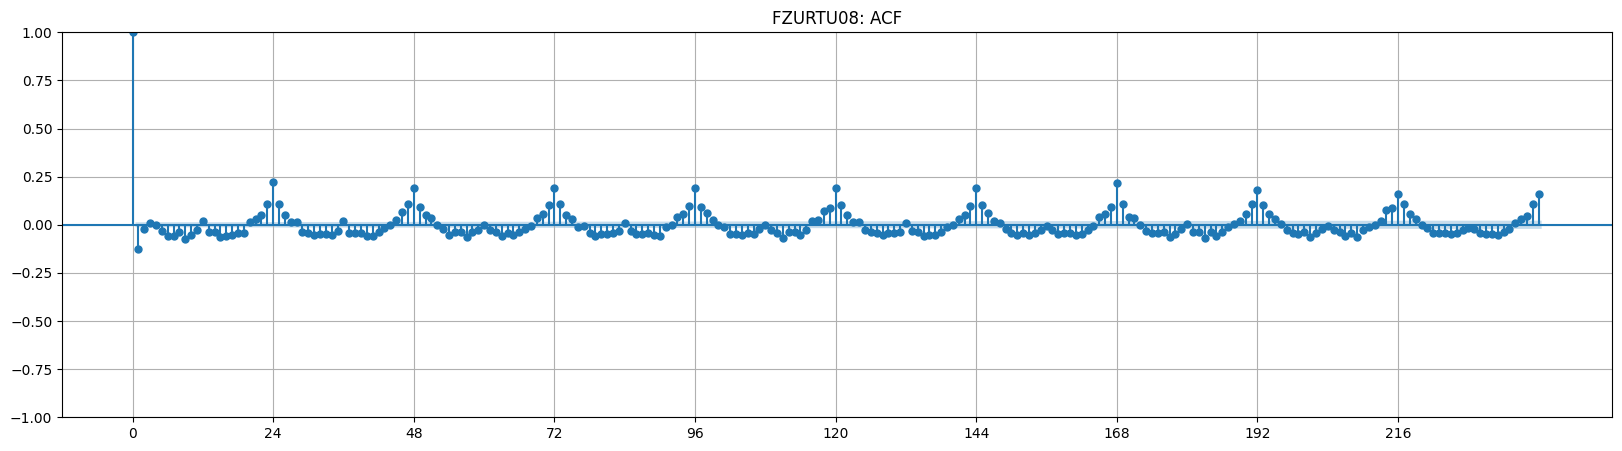

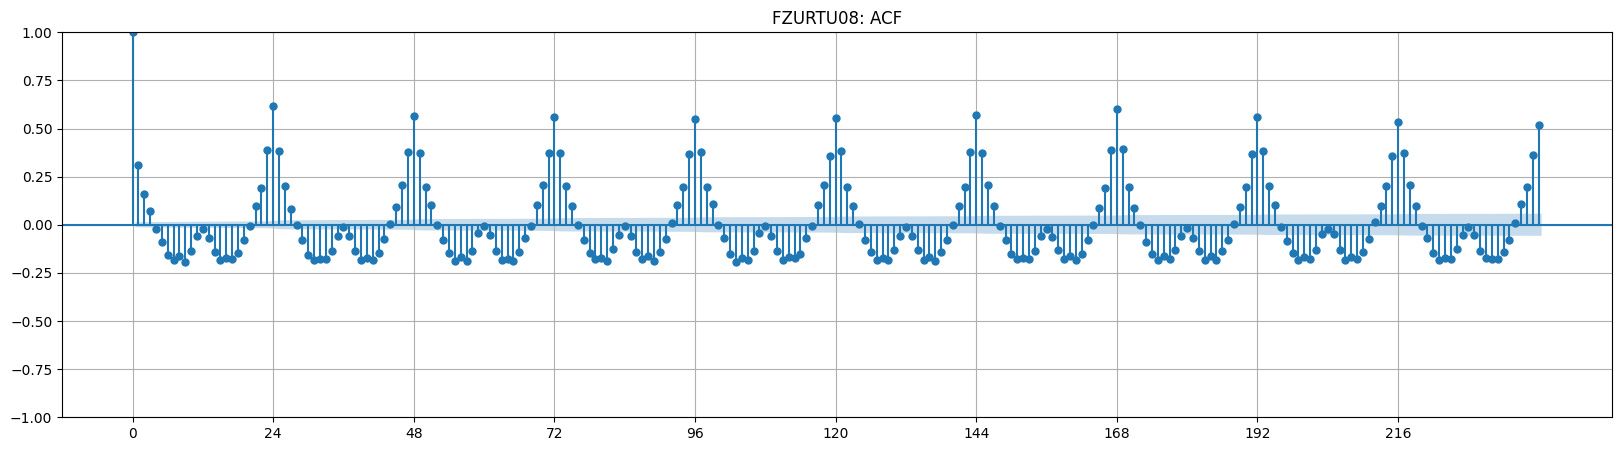

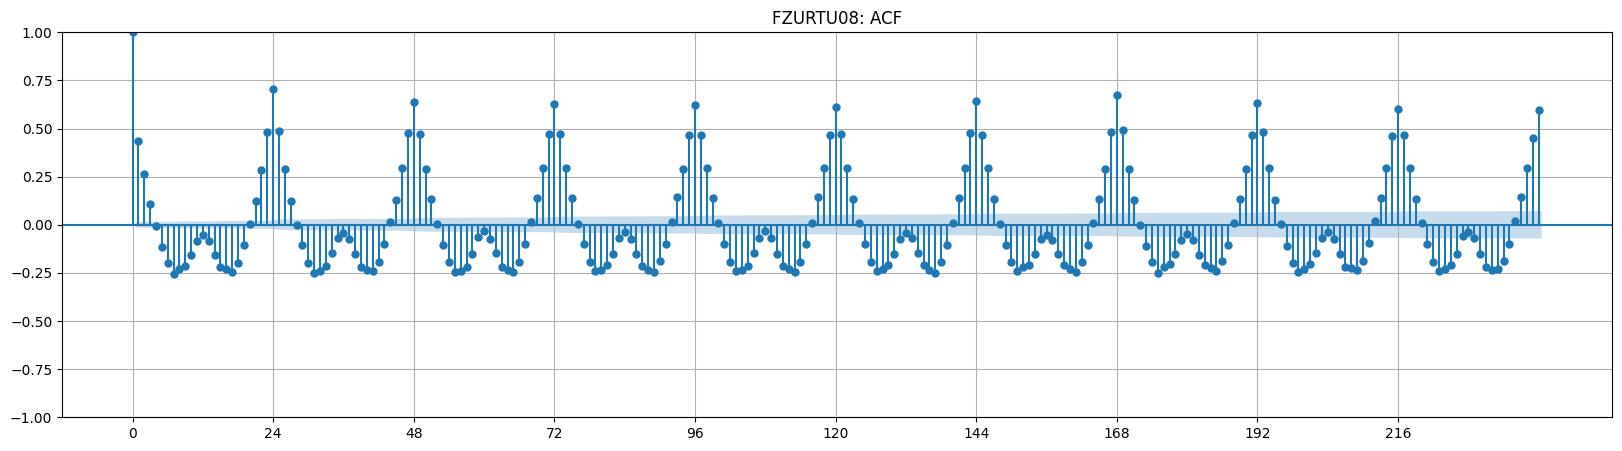

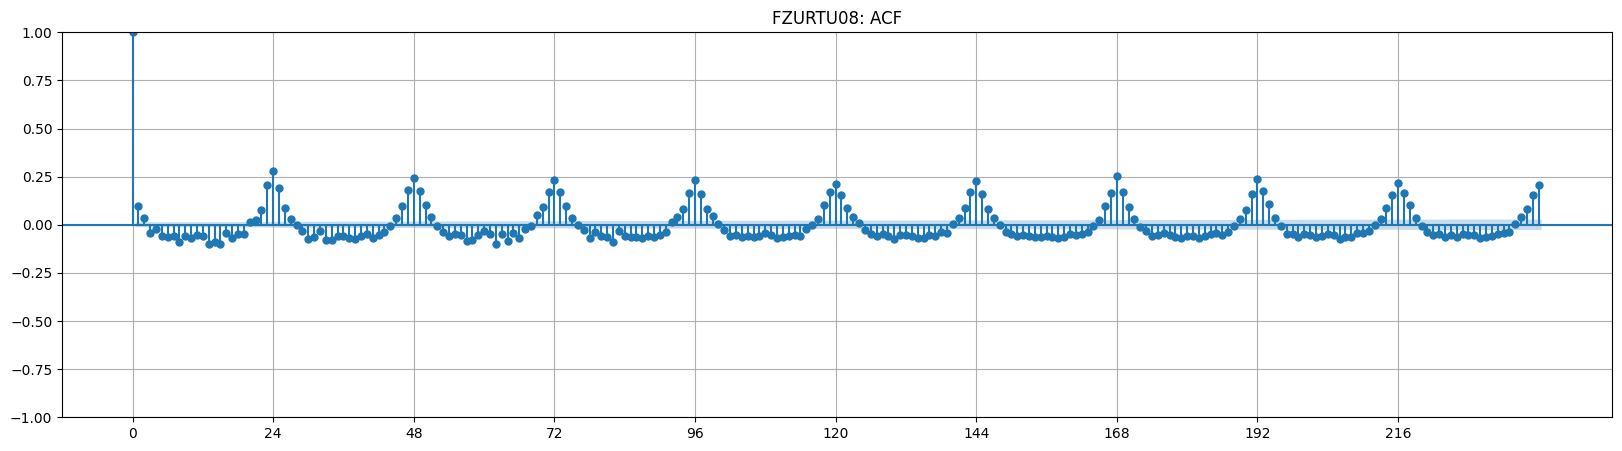

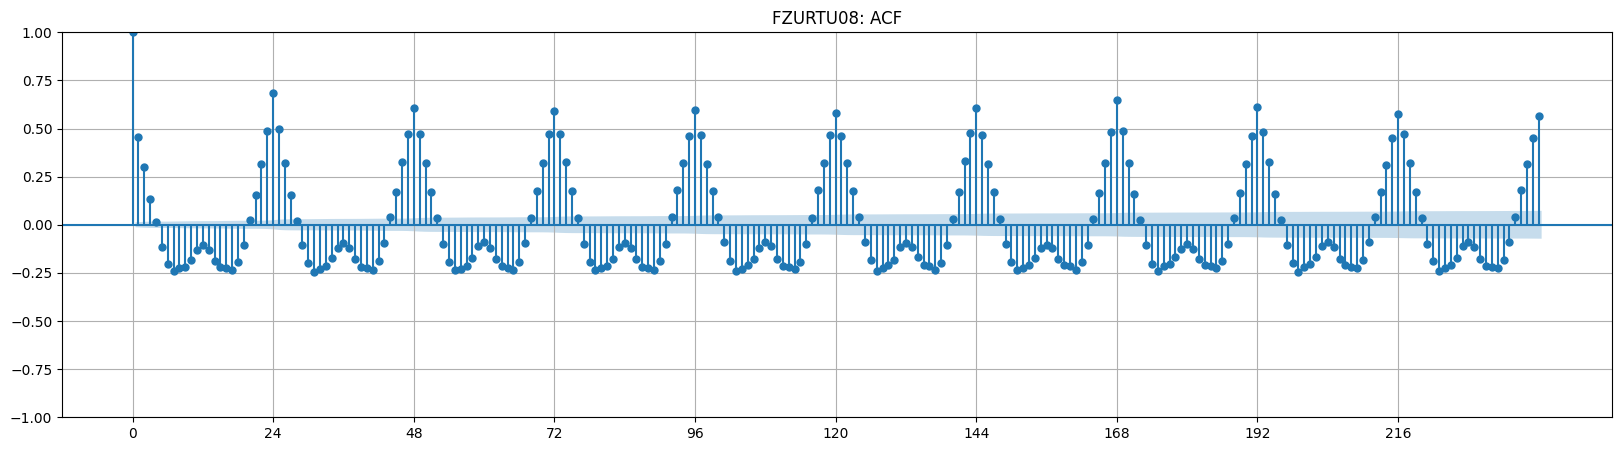

In [51]:
zones = df.columns.get_level_values(1).unique()
for i in range(5):
    
    # differenced values
    vals = df.loc[:, ('price',zones[i])].diff(1)
    nlags=24*10

    fig,ax=plt.subplots(figsize=(20,5))
    sm.graphics.tsa.plot_acf(vals.values[1:-1], lags=nlags, ax=ax)
    
    ax.set_xticks(np.arange(0,nlags,24))
    ax.set_title(f'{zone}: ACF')
    ax.grid()

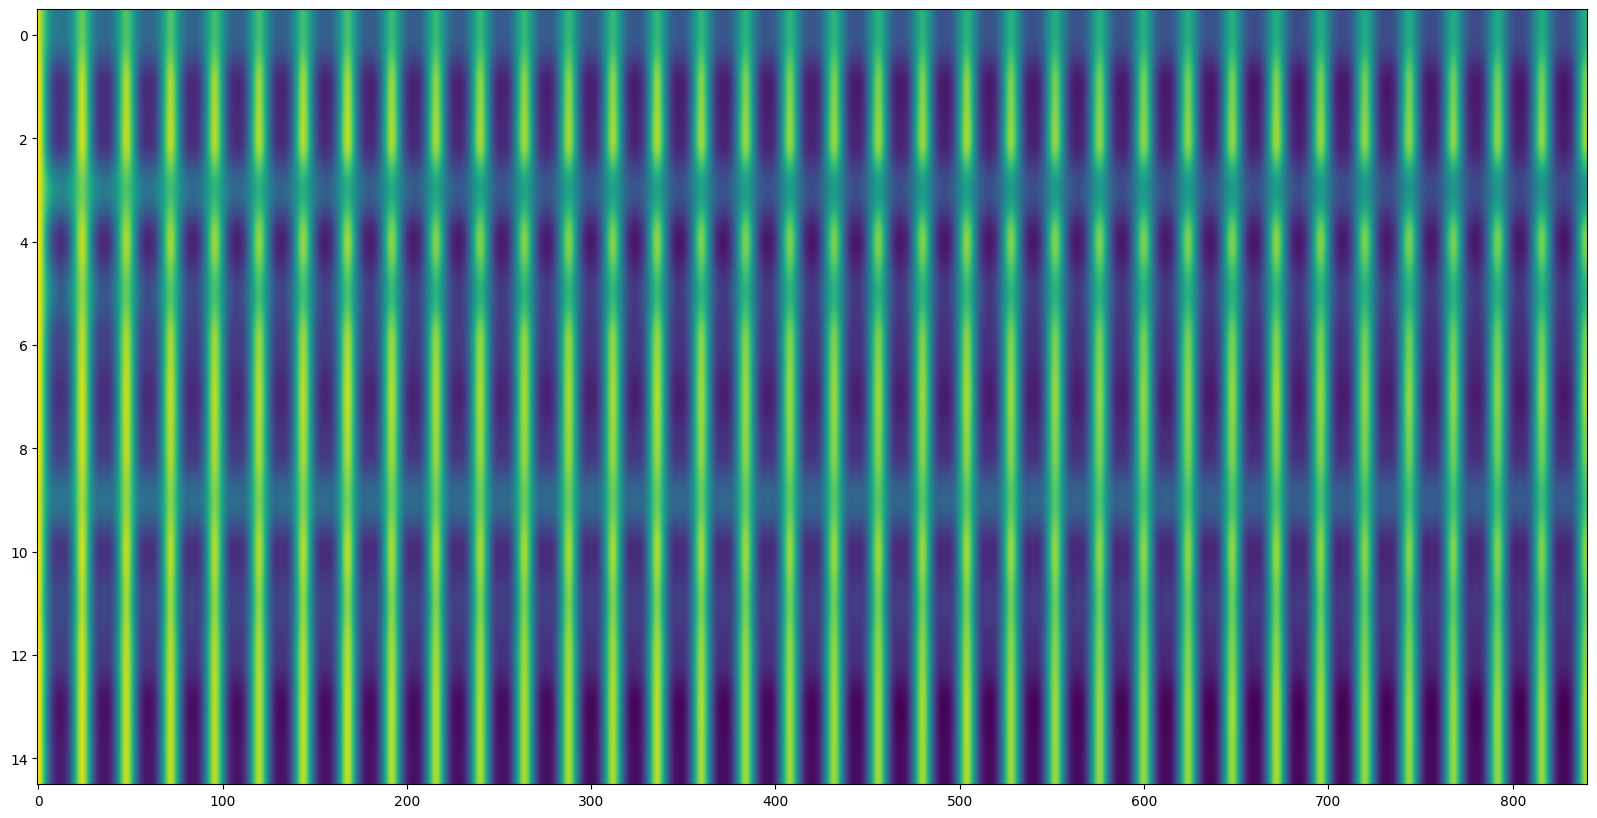

In [47]:
fig,ax=plt.subplots(figsize=(20,12))
ax.imshow(acf.T)
ax.set_aspect(acf.shape[0]/acf.shape[1]*0.5)

In [65]:
# ugly way of argmax-ing acf lags for each feature, but it works
( df
 .loc[:,('price',)]
 .diff(1)
    
# drop nan rows, left from differencing (sm.acf can't handle nans) 
.dropna()
.apply(sm.tsa.stattools.acf, adjusted=True, nlags=24*35)

# argmax 
.apply(lambda col: sorted(
    zip(np.arange(df.shape[0]),col),
    key=lambda x:-x[1]))

# rounding acf values 
.applymap(np.round, decimals=2)
# top 10
.head(10)
)

free_transfer_zone,FZSZKO28,FZSZOE27,FZURKR12,FZURNT09,FZUROE07,FZURTU08,FZVLBS15,FZVLOE13,FZYUAS18,FZYUDA23,FZYUKU20,FZYUOE16,FZYUVG17,FZZMSK26,FZZNOE24
0,"[0.0, 1.0]","[0.0, 1.0]","[0.0, 1.0]","[0.0, 1.0]","[0.0, 1.0]","[0.0, 1.0]","[0.0, 1.0]","[0.0, 1.0]","[0.0, 1.0]","[0.0, 1.0]","[0.0, 1.0]","[0.0, 1.0]","[0.0, 1.0]","[0.0, 1.0]","[0.0, 1.0]"
1,"[24.0, 0.22]","[24.0, 0.62]","[24.0, 0.71]","[24.0, 0.28]","[24.0, 0.69]","[24.0, 0.51]","[24.0, 0.64]","[24.0, 0.75]","[24.0, 0.63]","[24.0, 0.46]","[24.0, 0.63]","[24.0, 0.49]","[24.0, 0.68]","[24.0, 0.76]","[24.0, 0.76]"
2,"[168.0, 0.22]","[168.0, 0.61]","[168.0, 0.68]","[168.0, 0.26]","[168.0, 0.65]","[168.0, 0.44]","[168.0, 0.62]","[168.0, 0.73]","[168.0, 0.61]","[48.0, 0.37]","[168.0, 0.59]","[48.0, 0.46]","[168.0, 0.65]","[168.0, 0.75]","[168.0, 0.75]"
3,"[144.0, 0.19]","[144.0, 0.57]","[336.0, 0.65]","[336.0, 0.24]","[336.0, 0.64]","[336.0, 0.42]","[48.0, 0.59]","[336.0, 0.7]","[48.0, 0.61]","[72.0, 0.34]","[48.0, 0.59]","[72.0, 0.43]","[48.0, 0.64]","[336.0, 0.71]","[336.0, 0.72]"
4,"[96.0, 0.19]","[48.0, 0.57]","[144.0, 0.65]","[48.0, 0.24]","[192.0, 0.62]","[48.0, 0.41]","[336.0, 0.59]","[192.0, 0.69]","[192.0, 0.59]","[144.0, 0.32]","[144.0, 0.59]","[144.0, 0.43]","[144.0, 0.63]","[144.0, 0.71]","[144.0, 0.71]"
5,"[72.0, 0.19]","[336.0, 0.57]","[48.0, 0.64]","[192.0, 0.24]","[144.0, 0.61]","[192.0, 0.4]","[72.0, 0.58]","[144.0, 0.69]","[144.0, 0.59]","[168.0, 0.31]","[192.0, 0.58]","[168.0, 0.41]","[192.0, 0.63]","[48.0, 0.71]","[192.0, 0.71]"
6,"[48.0, 0.19]","[192.0, 0.56]","[192.0, 0.64]","[96.0, 0.23]","[504.0, 0.61]","[96.0, 0.4]","[144.0, 0.58]","[48.0, 0.69]","[72.0, 0.59]","[96.0, 0.31]","[72.0, 0.57]","[192.0, 0.4]","[72.0, 0.62]","[192.0, 0.71]","[48.0, 0.71]"
7,"[120.0, 0.19]","[72.0, 0.56]","[96.0, 0.63]","[72.0, 0.23]","[48.0, 0.61]","[144.0, 0.4]","[192.0, 0.58]","[72.0, 0.68]","[96.0, 0.59]","[192.0, 0.3]","[120.0, 0.57]","[96.0, 0.4]","[336.0, 0.62]","[96.0, 0.7]","[96.0, 0.7]"
8,"[192.0, 0.18]","[120.0, 0.56]","[72.0, 0.63]","[144.0, 0.23]","[312.0, 0.6]","[72.0, 0.39]","[96.0, 0.57]","[96.0, 0.67]","[336.0, 0.57]","[216.0, 0.3]","[96.0, 0.57]","[216.0, 0.4]","[96.0, 0.61]","[72.0, 0.7]","[72.0, 0.7]"
9,"[336.0, 0.18]","[96.0, 0.55]","[504.0, 0.63]","[312.0, 0.22]","[96.0, 0.6]","[504.0, 0.39]","[504.0, 0.57]","[504.0, 0.67]","[120.0, 0.57]","[120.0, 0.3]","[336.0, 0.57]","[120.0, 0.4]","[120.0, 0.61]","[120.0, 0.7]","[504.0, 0.69]"


In [ ]:
# 24, 168, 336, 144, 96 are at the top. All multiples of 24

In [71]:
# after pivoting we've got 195 columns 
df.shape

(23208, 195)

In [92]:
# dropping low variance features
var_threshold = 1e-5
df = ( df
 .drop(columns = df.columns[df.std(axis=0)<var_threshold])
)
df.shape

(23208, 162)

<Axes: xlabel='None,free_transfer_zone'>

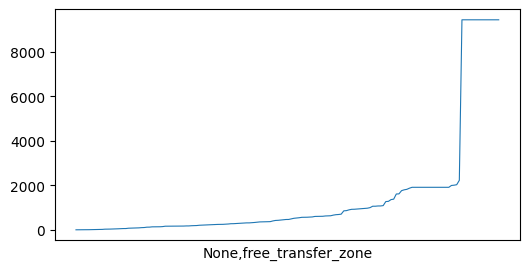

In [93]:
( df
 .select_dtypes('float')
 .std()
 .sort_values()
).plot(figsize=(6,3), xticks=[],lw=0.8)


In [97]:
( df
 .select_dtypes('float')
 .corr()
 .max(axis=0) > 0.7
)

              free_transfer_zone
hydro_plan    FZSZKO28              True
              FZSZOE27              True
              FZURKR12              True
              FZUROE07              True
              FZVLBS15              True
              FZVLOE13              True
              FZYUDA23              True
              FZYUKU20              True
              FZYUOE16              True
              FZYUVG17              True
              FZZNOE24              True
nuclear_plan  FZSZKO28              True
              FZSZOE27              True
              FZUROE07              True
              FZVLBS15              True
              FZVLOE13              True
              FZYUKU20              True
              FZZNOE24              True
thermal_plan  FZSZKO28              True
              FZSZOE27              True
              FZURKR12              True
              FZURNT09              True
              FZUROE07              True
              FZURTU08  

In [73]:
( df
 .select_dtypes('float')
 .std()
 .map(lambda x: x==0)
 .sum()
) 

33

In [43]:
from statsmodels.tsa.seasonal import STL

In [50]:
vals = ( df.loc[:, ('price',zones[2])]
          #.rolling(24)
          #.mean()
       )

In [51]:
stl = STL(vals, seasonal=13)
res = stl.fit()

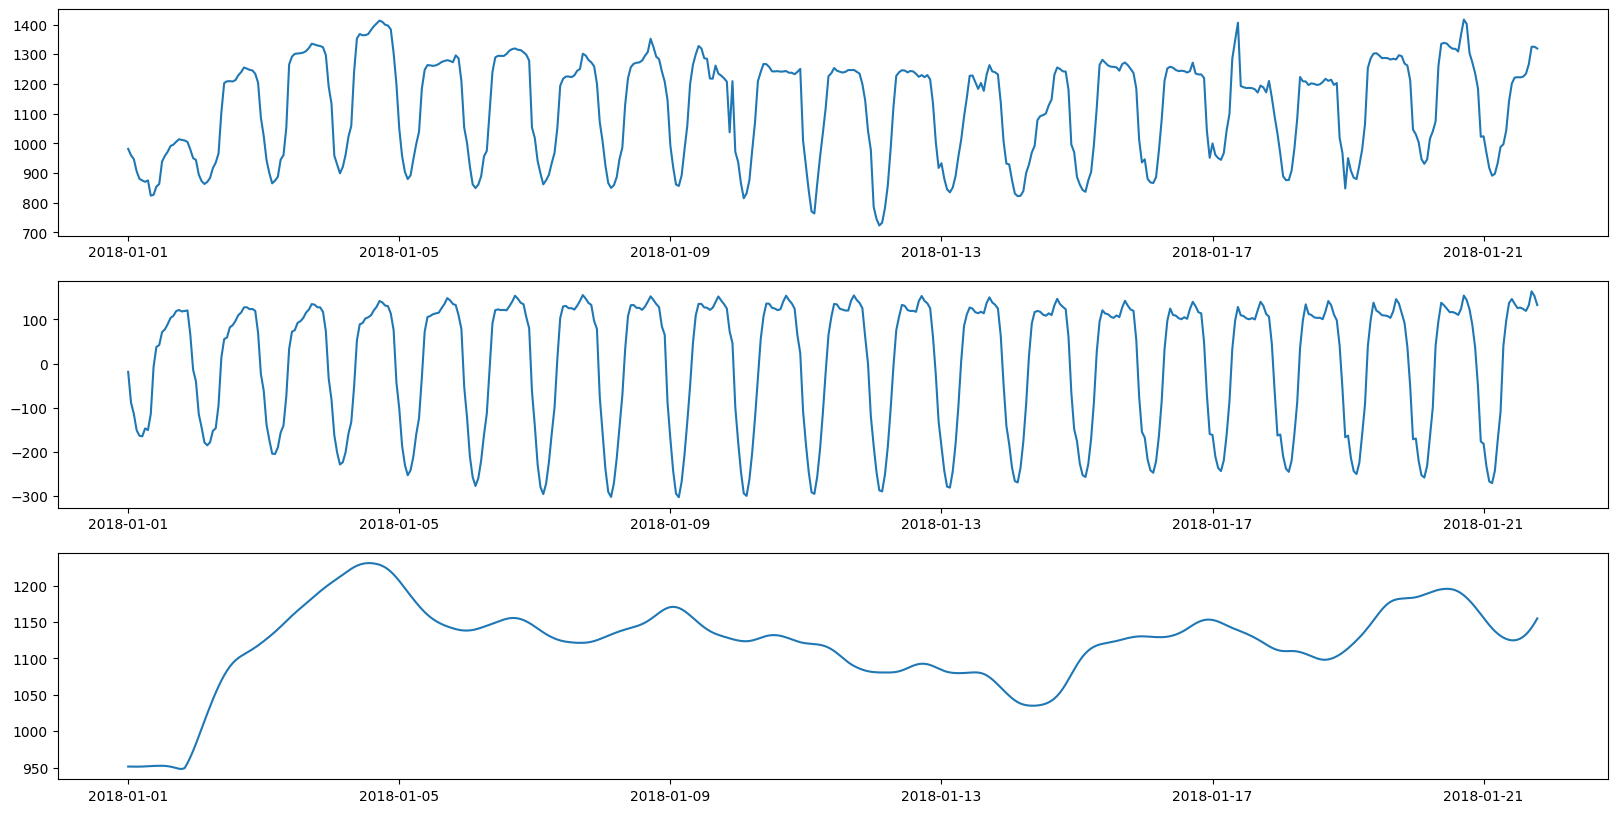

In [52]:
fig,ax=plt.subplots(3,1,figsize=(20,10))
ax[0].plot(res.observed.iloc[:500])
ax[1].plot(res.seasonal.iloc[:500])
ax[2].plot(res.trend.iloc[:500])

In [ ]:
#zones = df.columns.get_level_values(1).unique()
#df.loc[:,('price',)]
#df.loc[:, ('price',zone)]
sm.tsa.acf()

In [59]:

sorted(zip(np.arange(acf.shape[0]), np.abs(acf)), key=lambda x: -x[1])

[(0, 1.0),
 (24, 0.6162933085384953),
 (168, 0.6016311845597726),
 (144, 0.570936445057392),
 (48, 0.5667454052015404),
 (72, 0.5607196324262882),
 (192, 0.5594052255911858),
 (120, 0.5537951710279354),
 (96, 0.5507840456396758),
 (216, 0.5331901416815703),
 (240, 0.5201987982345133),
 (169, 0.3943923050426988),
 (23, 0.3899660825555149),
 (167, 0.3876177379445581),
 (193, 0.38376028231958054),
 (121, 0.3812937033533432),
 (25, 0.38084559867211054),
 (97, 0.37943264216123457),
 (47, 0.3767066491750506),
 (143, 0.3762611800121091),
 (145, 0.37530960370743544),
 (217, 0.3744499996620967),
 (49, 0.3739474798039919),
 (71, 0.3737824824353716),
 (73, 0.3711279365407061),
 (191, 0.36926006900943936),
 (95, 0.36605783196009023),
 (239, 0.36016862909880015),
 (119, 0.35887188276107335),
 (215, 0.3559671112633973),
 (1, 0.3082209223263058),
 (46, 0.209312097957824),
 (218, 0.20735041051047717),
 (118, 0.2065713329094635),
 (70, 0.20446823894895955),
 (146, 0.2041998162722227),
 (74, 0.200934006

In [32]:
df.index.get_level_values(1)

CategoricalIndex(['FZSZKO28', 'FZSZOE27', 'FZURKR12', 'FZURNT09', 'FZUROE07',
                  'FZURTU08', 'FZVLBS15', 'FZVLOE13', 'FZYUAS18', 'FZYUDA23',
                  ...
                  'FZURTU08', 'FZVLBS15', 'FZVLOE13', 'FZYUAS18', 'FZYUDA23',
                  'FZYUKU20', 'FZYUOE16', 'FZYUVG17', 'FZZMSK26', 'FZZNOE24'],
                 categories=['FZSZKO28', 'FZSZOE27', 'FZURKR12', 'FZURNT09', ..., 'FZYUOE16', 'FZYUVG17', 'FZZMSK26', 'FZZNOE24'], ordered=False, dtype='category', name='free_transfer_zone', length=348120)

In [47]:
new_names = ['date', 
             'price_zone', 
             'free_transfer_zone', 
             'hour', 
             'hydro_plan',
             'nuclear_plan', 
             'thermal_plan', 
             'thermal_min', 
             'thermal_max',
             'consumption', 
             'export',
             'import',
             'solar_plan',
             'wind_plan',
             'renewable_plan',
             'supply_1',
             'supply_2',
             'price',
            ]

df2 = ( pd
      .read_csv('/kaggle/input/all-energy-v0/all_energy.csv')
      
       # rename columns for better readability
      .pipe(lambda df: df.rename(columns = dict(zip(df.columns, new_names))))
       
       # casting\shrinking
      .astype({'date': 'datetime64[ns]',
               'free_transfer_zone': 'category',
               'hour': 'int8'})
      .pipe(lambda df: df.astype({ col: 'float32' 
                                  for col in df.select_dtypes('float64').columns }))
      
      # dropping zero-variance features
      .drop(columns = ['price_zone',
                       'renewable_plan'])
      
      # removing trailing spaces
      .pipe(lambda df: df.assign(free_transfer_zone =
              df.free_transfer_zone.cat.rename_categories(lambda s: s.strip())))
      
      # combining hours and dates into a single feature
      .pipe(lambda df: df.assign( dtime = df['date'] + pd.to_timedelta(df.hour, unit='hour')))
      
      .drop(columns = ['date', 'hour'])
      .set_index(['dtime', 'free_transfer_zone'])
      .sort_index()
)

In [52]:
all(df2 == df)

True